# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [18]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

Note: you may need to restart the kernel to use updated packages.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [19]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [20]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
# Write your code here to read the data
# Read the data from the CSV file. The path to the location of CSV file has been changed to a local path.

path = r"C:\Users\nagas\Downloads\Introduction to Python\AI_ML\AI_ML\FoodHub_project\FoodHub_order.csv"
data = pd.read_csv(path)
data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [22]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [23]:
# Write your code here
num_rows, num_cols = data.shape
print("Number of rows: ",num_rows) 
print("Number of columns: ", num_cols)


Number of rows:  1898
Number of columns:  9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [24]:
# Write your code here
print("Approach 1 using dtypes data types: ")
print(data.dtypes);
print() #print a new line for better readability
print("Approach 2 using info method: ")
print(data.info());

Approach 1 using dtypes data types: 
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Approach 2 using info method: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   in

#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [25]:
# Write your code here

print("Number of missing values in each column:")
print(data.isnull().sum())

# Deeper analysis of missing values

# Filter rows where 'rating' is 'Not given'
filtered_data = data[data['rating'] == 'Not given']
print("")
print("There are", filtered_data['rating'].count(), "rows where rating is 'Not given'")

#Replace 'Not given' with NaN
data['rating'] = data['rating'].replace('Not given', np.nan)

# Convert 'rating' column to numeric
data['rating'] = pd.to_numeric(data['rating']).astype('Int64')
print("")
print("After replacing 'Not given' with NaN and converting to numeric:")
print(data.info())


Number of missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are 736 rows where rating is 'Not given'

After replacing 'Not given' with NaN and converting to numeric:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_prepar

#### Observations:
At a first glance there were no missing or null values, but deeper analysis revealed that "rating" column had  some "Not Given" values. 
It was converted to NaN and the data type of the column has been converted from object to integer type

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [26]:
# Write your code here
stat_summary = data['food_preparation_time'].describe().loc[["mean", "min", "max"]].rename(index={"mean": "Average (Mean)", "min": "Minimum", "max": "Maximum"});
print("Statistical summary of food preparation time:")
print(stat_summary)



Statistical summary of food preparation time:
Average (Mean)    27.37197
Minimum           20.00000
Maximum           35.00000
Name: food_preparation_time, dtype: float64


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

<span style="font-size:16px;">
<b>Nagasayana's Response - </b>The ratings "Not Given" were converted to NaN in Question 3. 
We are just finding the NaN values here and counting them.
</span>

In [27]:
# Write the code here
missing_ratings_count = data['rating'].isnull().sum()
print("Number of missing ratings:", missing_ratings_count)

Number of missing ratings: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<span style="font-size:16px;">
<b>Nagasayana's observation - </b><br>
<br>Numerical Variable Analysis:
<br>Cost of order is <b>Right-skewed</b>, meaning most orders are low-cost, but a few high-cost ones increase the mean.
<br>Food preperation time distribution does not have outliers and is in the consistent range of 20 to 30 minutes.
<br>Delivery time is fairly normal, with a few extreme cases taking longer to deliver.
<br>Most resturanats that have been rated have a rating of 4s and 5s meaning that people are liking the resturants. More than  
<br>
<br>Categorical Variable Analysis:
<br>Some cuisines dominate order trends more than others. American food is most prefered and the vietnamese is the least prefered.
<br>There are higher number of orders on weekends than weekdays.
</br>
</span>

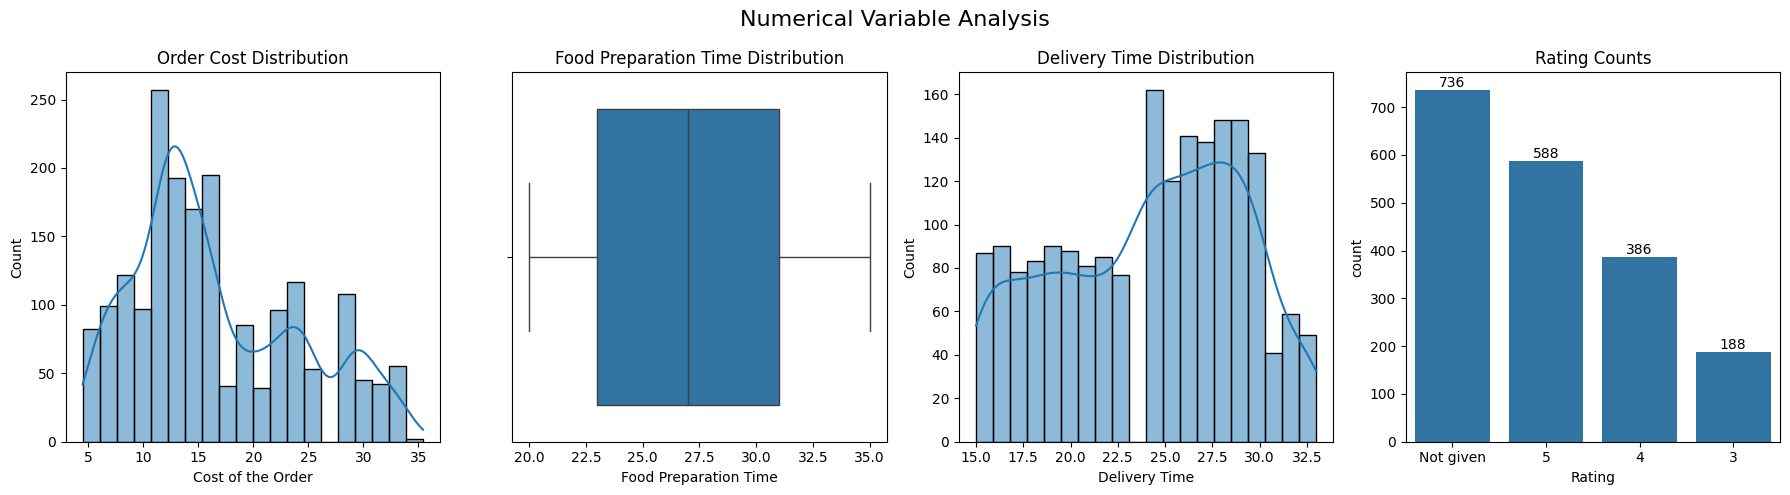

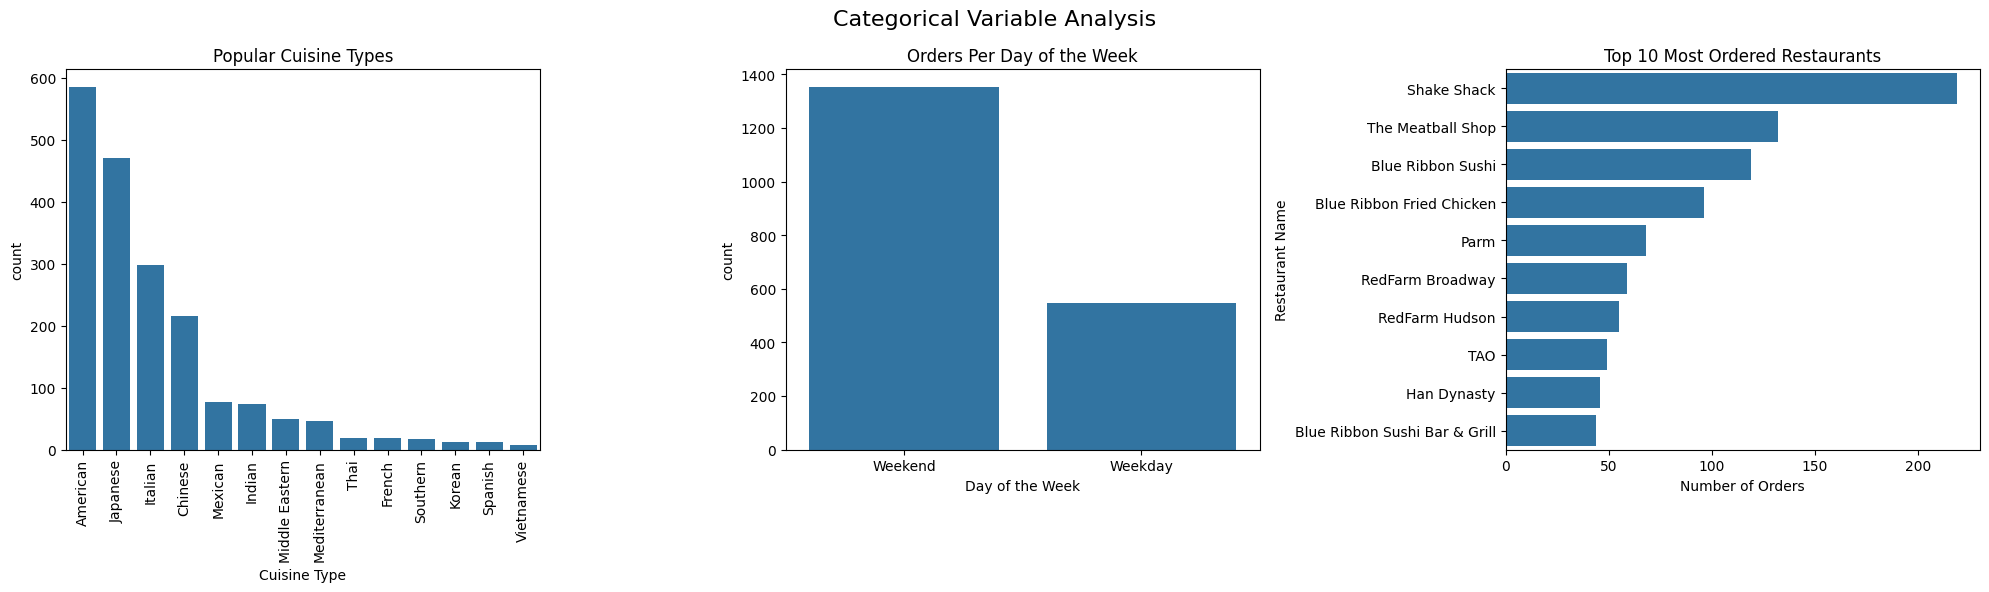

In [28]:
# # Write the code here

#Numerical Variable Analysis
fig, axes = plt.subplots(1, 4, figsize=(18, 5)) 
fig.suptitle("Numerical Variable Analysis", fontsize=16)

# Histogram of order cost (left)
sns.histplot(data["cost_of_the_order"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Order Cost Distribution")
axes[0].set_xlabel("Cost of the Order")

# Boxplot of food preparation time (right)
sns.boxplot(x=data["food_preparation_time"], ax=axes[1])
axes[1].set_title("Food Preparation Time Distribution")
axes[1].set_xlabel("Food Preparation Time")

sns.histplot(data["delivery_time"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Delivery Time Distribution")
axes[2].set_xlabel("Delivery Time")

data_plot = data.copy()
# Replace NaN values with "Not given" for plotting  
data_plot['rating'] = data_plot['rating'].astype(object).fillna('Not given')

sns.countplot(x=data_plot["rating"], ax=axes[3], order=data_plot['rating'].value_counts().index)
axes[3].set_title("Rating Counts")
axes[3].set_xlabel("Rating")
# Optionally, add value labels on top of the bars
for p in axes[3].patches:
    axes[3].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')

# Show the plots
plt.tight_layout()
plt.show()

#Categorical Variable Analysis
fig2, axes2 = plt.subplots(1, 3, figsize=(20, 6))
fig2.suptitle("Categorical Variable Analysis", fontsize=16)

axes2[0].set_title("Popular Cuisine Types")
sns.countplot(x=data["cuisine_type"], ax=axes2[0], order=data['cuisine_type'].value_counts().index)
axes2[0].set_xlabel("Cuisine Type")
axes2[0].set_xticks(range(len(axes2[0].get_xticklabels())))  # Ensure tick positions are set
axes2[0].set_xticklabels(axes2[0].get_xticklabels(), rotation=90)

sns.countplot(x=data["day_of_the_week"], ax=axes2[1], order=data['day_of_the_week'].value_counts().index)
axes2[1].set_title("Orders Per Day of the Week")
axes2[1].set_xlabel("Day of the Week")

top_restaurants = data["restaurant_name"].value_counts().nlargest(10)
sns.barplot(y=top_restaurants.index, x=top_restaurants.values, ax=axes2[2])
axes2[2].set_title("Top 10 Most Ordered Restaurants")
axes2[2].set_xlabel("Number of Orders")
axes2[2].set_ylabel("Restaurant Name")
plt.tight_layout()
plt.show()



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

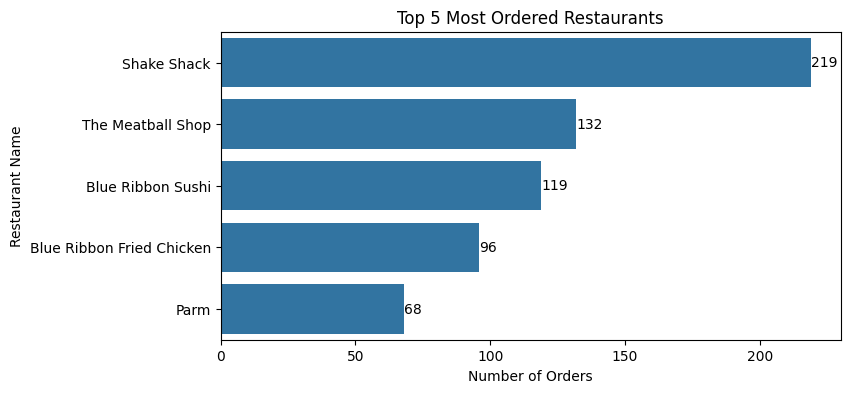

The top 5 most ordered restaurants are:


,Restaurant Name,Cuisine Type,Number of Orders,Percentage (%),Delivery Time
0,Shake Shack,American,219,34.54%,24.66
1,The Meatball Shop,Italian,132,20.82%,24.24
2,Blue Ribbon Sushi,Japanese,119,18.77%,23.94
3,Blue Ribbon Fried Chicken,American,96,15.14%,24.15
4,Parm,Italian,68,10.73%,25.50
5,Total,,634,100.0%,NaN


In [29]:
# Write the code here
top_restaurants = data["restaurant_name"].value_counts().nlargest(5)
top_restaurants

plt.figure(figsize=(8, 4))
ax = sns.barplot(y=top_restaurants.index, x=top_restaurants.values, color = "blue")
for i, value in enumerate(top_restaurants.values):
    ax.text(value, i, str(value), ha='left', va='center', fontsize=10, color='black')
sns.barplot(y=top_restaurants.index, x=top_restaurants.values)
plt.title("Top 5 Most Ordered Restaurants")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()

print("The top 5 most ordered restaurants are:")
top_restaurants_df = top_restaurants.reset_index()
top_restaurants_df.columns = ["Restaurant Name", "Number of Orders"]
# Add cuisine type to the top restaurants DataFrame
top_restaurants_cuisine = data.groupby("restaurant_name")["cuisine_type"].agg(lambda x: x.mode()[0])
top_restaurants_df["Cuisine Type"] = top_restaurants_df["Restaurant Name"].map(top_restaurants_cuisine)

# Reorder columns for clarity
top_restaurants_df = top_restaurants_df[["Restaurant Name", "Cuisine Type", "Number of Orders"]]
total_orders = top_restaurants_df["Number of Orders"].sum()
# Add a row for total with an empty string for Cuisine Type
top_restaurants_df.loc[len(top_restaurants_df)] = ["Total", "", total_orders]
top_restaurants_df["Percentage (%)"] = ((top_restaurants_df["Number of Orders"] / total_orders) * 100).round(2).astype(str) + "%"

# Calculate mean delivery time for each restaurant from the original data
mean_delivery_times = data.groupby("restaurant_name")["delivery_time"].mean().round(2)
# Map the mean delivery time to the top_restaurants_df
top_restaurants_df["Delivery Time"] = top_restaurants_df["Restaurant Name"].map(mean_delivery_times)

top_restaurants_df



#### Observations:
<span style="font-size:16px;">
<br>The top 5 most ordered restaurants are below and we can find that American resturants account for 315 orders which make it the most preferred food or cuisine type.
<br>Shake Shack                  219
<br>The Meatball Shop            132
<br>Blue Ribbon Sushi            119
<br>Blue Ribbon Fried Chicken     96
<br>Parm                          68
<br>Name: restaurant_name, dtype: int64
</br>
</span>

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [30]:
# Write the code here
weekend_orders = data[data["day_of_the_week"] == "Weekend"]
# Count orders for each restaurant
popular_restaurant = weekend_orders["restaurant_name"].value_counts().idxmax()
popular_restaurant_count = weekend_orders["restaurant_name"].value_counts().max()
print("Most popular restaurant on weekends is", popular_restaurant, "with", popular_restaurant_count, "orders.")


popular_restaurant_orders = data[data["restaurant_name"] ==popular_restaurant]

# Count orders where the rating is missing or 'Not Given'
unrated_orders = popular_restaurant_orders["rating"].isna().sum() + (popular_restaurant_orders["rating"] == "Not Given").sum()

print(f"Number of " + popular_restaurant + " orders without a rating: " + unrated_orders.astype(str))


Most popular restaurant on weekends is Shake Shack with 145 orders.
Number of Shake Shack orders without a rating: 86


#### Observations:
Most popular restaurant on weekends is Shake Shack with 145 orders. The number of orders that have not been rated are 86. Shake Shack can offer promotions for rating the orders. This will increase the customer base and Shake Shacks business.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [31]:
# Write the code here
percentage = (data["cost_of_the_order"] > 20).mean() * 100
print(f"Percentage of orders costing more than $20: {percentage:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [32]:
# Write the code here
mean_delivery_time = data["delivery_time"].mean()
print(f"Mean Order Delivery Time: {mean_delivery_time:.2f} minutes")
mean_delivery_time_by_day = data.groupby("day_of_the_week")["delivery_time"].mean()
print("Mean Order Delivery Time by Day of the Week:")
print(mean_delivery_time_by_day);

Mean Order Delivery Time: 24.16 minutes
Mean Order Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [33]:
# Write the code here

top_customers = data["customer_id"].value_counts().nlargest(3)
top_customers = top_customers.reset_index()
top_customers.columns = ["Customer ID", "Number of Orders"]
top_customers
print("Top 3 customers with the most orders:")
top_customers

Top 3 customers with the most orders:


,Customer ID,Number of Orders
0,52832,13
1,47440,10
2,83287,9


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


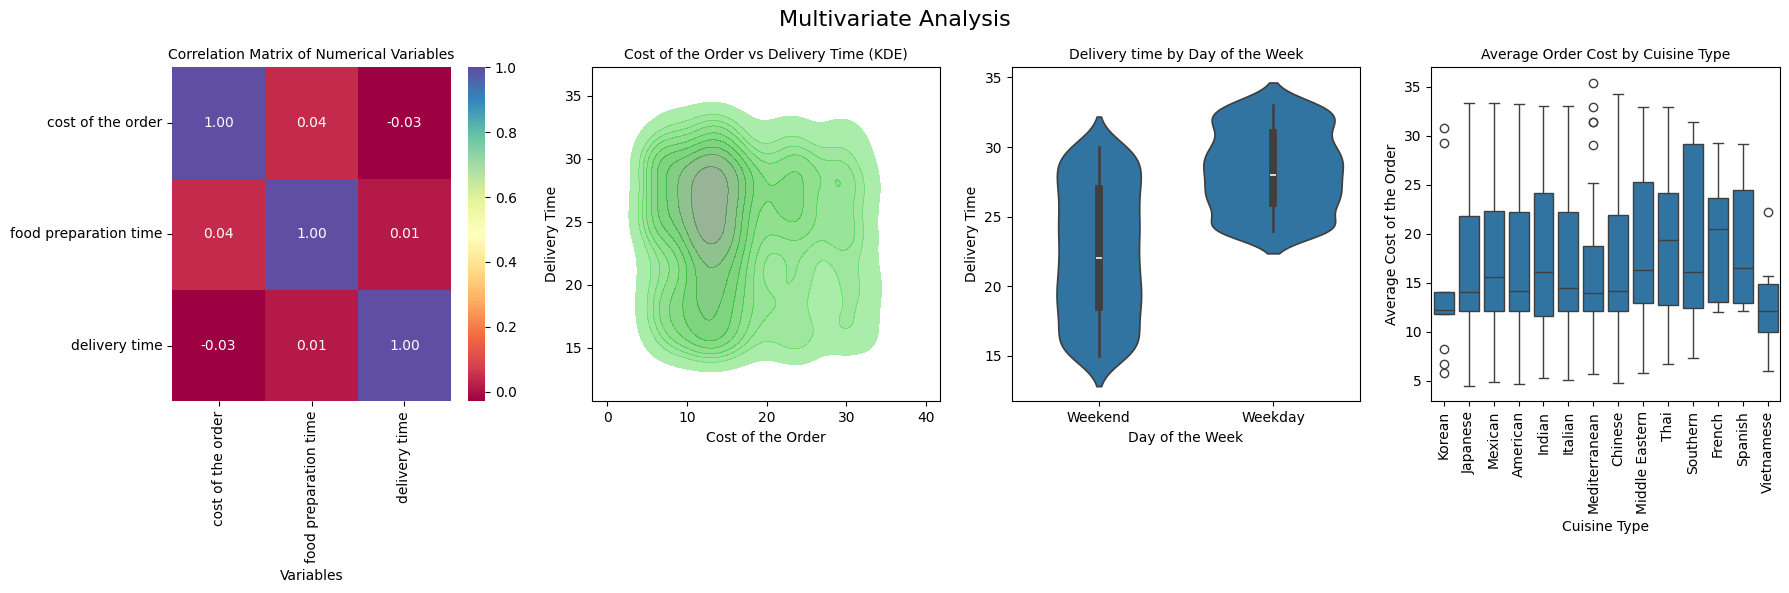

In [68]:
# Write the code here

fig3, axes3 = plt.subplots(1, 4, figsize=(18, 6)) 
fig3.suptitle("Multivariate Analysis", fontsize=16)

corr_matrix = data[["cost_of_the_order", "food_preparation_time", "delivery_time"]].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f", ax=axes3[0])
axes3[0].set_title("Correlation Matrix of Numerical Variables", fontsize=10)
axes3[0].set_xlabel("Variables")
axes3[0].set_xticklabels([label.get_text().replace("_", " ") for label in axes3[0].get_xticklabels()], rotation=90, )
axes3[0].set_yticklabels([label.get_text().replace("_", " ") for label in axes3[0].get_yticklabels()], rotation=0)


# Bivariate KDE plot: Cost of the Order vs Delivery Time
sns.kdeplot(
	x=data["cost_of_the_order"],
	y=data["delivery_time"],
	fill=True,
	color="green",
	alpha=0.5,
	ax=axes3[1]
)
axes3[1].set_title("Cost of the Order vs Delivery Time (KDE)", fontsize=10)
axes3[1].set_xlabel("Cost of the Order")
axes3[1].set_ylabel("Delivery Time")

sns.violinplot(data=data, x="day_of_the_week", y="delivery_time",ax=axes3[2])
axes3[2].set_title("Delivery time by Day of the Week", fontsize=10)
axes3[2].set_xlabel("Day of the Week")
axes3[2].set_ylabel("Delivery Time")

sns.boxplot(data=data, x="cuisine_type", y="cost_of_the_order", ax=axes3[3])
axes3[3].set_title("Average Order Cost by Cuisine Type", fontsize=10)
categories = data["cuisine_type"].unique()
axes3[3].set_xlabel("Cuisine Type")
#axes3[3].set_xticklabels(axes3[3].get_xticklabels(), rotation=90)
axes3[3].set_xticks(range(len(categories)))

# Set the tick labels with rotation, ensuring they match the categories
axes3[3].set_xticklabels(categories, rotation=90)
axes3[3].set_ylabel("Average Cost of the Order")
axes3[3].set_xticks(range(len(axes3[3].get_xticklabels())))  # Ensure tick positions are set

plt.tight_layout()
plt.show()






### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [82]:
# Write the code here

data_dropna = data.dropna(subset=['rating'])

restaurant_stats = data_dropna.groupby('restaurant_name').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count'),
    cuisine_type=('cuisine_type', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0])
).reset_index()

restaurant_stats['average_rating'] = restaurant_stats['average_rating'].round(2)
restaurant_stats = restaurant_stats.sort_values(by='average_rating', ascending=False)

# Filter restaurants based on criteria
# Now, eligible_restaurants is a fresh DataFrame created by filtering,
# so no SettingWithCopyWarning should occur when displaying or further manipulating it.
eligible_restaurants = restaurant_stats[
     (restaurant_stats['average_rating'] > 4)&
    (restaurant_stats['rating_count'] > 50) 
   
]

eligible_restaurants = eligible_restaurants[
    ['restaurant_name', 'cuisine_type', 'rating_count', 'average_rating']
]
eligible_restaurants = eligible_restaurants.reset_index(drop=True)

# Display the eligible restaurants
print("Restaurants eligible for the promotional offer:")
eligible_restaurants

Restaurants eligible for the promotional offer:


,restaurant_name,cuisine_type,rating_count,average_rating
0,The Meatball Shop,Italian,84,4.51
1,Blue Ribbon Fried Chicken,American,64,4.33
2,Shake Shack,American,133,4.28
3,Blue Ribbon Sushi,Japanese,73,4.22


#### Observations:
There are only 4 resturants that made it to the list. This means that there are a lot of orders that have not been rated or rating is less than 4. Also considering the cuisine types mean that the italian, American and Japanese are rated higher than other cuisine types. Also Shake Shack has the highest count of rating meaning that there are high number of returning and loyal customers. Resturants should provides some incentives or offers for returing loyal customers and request customers to provide the ratings.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [81]:
# Write the code here

# Function to calculate revenue per order
def calculate_revenue_per_order(row):
    cost = row['cost_of_the_order']
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.00

# Apply the function to create a new 'revenue_per_order' column
data['revenue_per_order'] = data.apply(calculate_revenue_per_order, axis=1).round(2)

# Group by restaurant name and sum the revenue to get total revenue per restaurant
restaurant_revenue = data.groupby('restaurant_name')['revenue_per_order'].sum().reset_index()

# Sort in descending order by revenue to find the top restaurants
top_revenue_restaurants = restaurant_revenue.sort_values(by='revenue_per_order', ascending=False)

print("The net revenue generated across all orders is $",data["revenue_per_order"].sum().round(2))
print("")

print("Top 5 restaurants that incurred the most revenue for the company:")
top_revenue_restaurants.reset_index(drop=True).head(5)

The net revenue generated across all orders is $ 6166.4

Top 5 restaurants that incurred the most revenue for the company:


,restaurant_name,revenue_per_order
0,Shake Shack,703.59
1,The Meatball Shop,419.80
2,Blue Ribbon Sushi,360.48
3,Blue Ribbon Fried Chicken,340.27
4,Parm,218.58


#### Observations:
As expected, current and previous observations conclude that the revenue is again from the top resturants like Shake Shack, Meatball shop and Blue ribbon suchi and fried chicken. Shake shack is the leader and indicates that the resturant is highly popular. This can also mean that the resturant has maximum number of orders or the cost of the order is on the higher range leading to higher cut to the company.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [85]:
# Write the code here

# Calculate the total time required for delivery
data['total_delivery_time'] = data['food_preparation_time'] + data['delivery_time']

# Count orders that take more than 60 minutes
orders_gt_60_minutes = data[data['total_delivery_time'] > 60].shape[0]

# Total number of orders
total_orders = data.shape[0]

# Calculate the percentage
percentage_gt_60_minutes = (orders_gt_60_minutes / total_orders) * 100

print("Percentage of orders that take more than 60 minutes to be delivered:", round(percentage_gt_60_minutes, 2), "%")


Percentage of orders that take more than 60 minutes to be delivered: 10.54 %


#### Observations:
There are about 10.54% of the orders that take more than 60 minutes for preperation of the food and delivery. This could be because of various factors like slower food preperation time, longer or inefficient delivery process/routes, busy resturants (might be because of the peak timing). Longer delivery timings could also mean poor customer experience and highly dissatisfied customers. This could result in poor customer loyality, ratings as well.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [87]:
# Write the code here

mean_delivery_time_by_day = data.groupby('day_of_the_week')['delivery_time'].mean().reset_index().round(2)

# Display the result
print("Mean delivery time by day of the week:")
mean_delivery_time_by_day

Mean delivery time by day of the week:


,day_of_the_week,delivery_time
0,Weekday,28.34
1,Weekend,22.47


#### Observations:
The mean delivery time varies between weekdays and weekends as follows:
<br>Weekday: The mean delivery time on weekdays is approximately 28.34 minutes.
<br>Weekend: The mean delivery time on weekends is approximately 22.47 minutes.

<br><br> Orders placed on weekends have a quicker delivery time than the orders placed on weekdays. This could mean a lot of things like better delivery logistics, lesser traffic, increased delivery personnel may be part time who work on weekdays and delvier food on weekends



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---